# Notebook associated with the paper entitled "Tectonic, Topographic, Geologic, and Hydroclimatic Influence on Crack Formation During the 2021 Haiti Earthquake" from Saint Fleur et al.

In [51]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np 
# matplotlib and seaborn for the plots
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.edgecolor'] = "black"
import seaborn as sns 
from geopy import distance

#stat
import scipy.stats as st 
from scipy.optimize import curve_fit

from sklearn.impute import KNNImputer


# Delete warnings 
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv("rupture_latspread.csv") 
# Note that rupture_latspread.csv is the same as SaintFleur_etal_G3_TabS1.xls
df.head()

,date,description,possible_structure,lat,lon,strike,dip,length_m,opening_cm,lateral_offset_cm,vertical_offset_cm,angle_with_epgf,dist_to_river_m,slope,geology,rainfall_mm_yr-1,photo_ref
0,2021-08-25,Crack in L’Asile – possible Crack ; probably s...,Rupture,18.37944,-73.40500,267.0,NaN,125.0,10.0,NaN,10.0,182.0,95,NaN,ep,NaN,IMG_0470-IMG_0479
1,2021-08-25,Short crack with sand around,Rupture,18.38574,-73.41023,300.0,NaN,3.0,20.0,NaN,NaN,215.0,60,NaN,qa,NaN,IMG_0480-IMG_0483
2,2021-08-25,Long crack with sand along a part,Rupture,18.41944,-73.41000,300.0,NaN,100.0,20.0,NaN,NaN,215.0,300,NaN,ep,NaN,IMG_0480-IMG_0483
3,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41167,75.0,NaN,NaN,NaN,NaN,NaN,10.0,125,NaN,qa,NaN,NaN
4,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41139,75.0,NaN,NaN,NaN,NaN,NaN,10.0,130,NaN,qa,NaN,NaN


# Data exploratory analysis

In [16]:
# Detecting missing values
print(df.isna().sum(), '\n Total NaN: {}'.format(df.isna().sum().sum()))

date                    0
description             0
possible_structure      0
lat                     0
lon                     0
strike                 14
dip                   111
length_m               48
opening_cm             34
lateral_offset_cm      96
vertical_offset_cm     79
angle_with_epgf        14
dist_to_river_m         0
slope                 111
geology                 0
rainfall_mm_yr-1      111
photo_ref              24
dtype: int64 
 Total NaN: 642


In [17]:
for col in df:
    if df[col].isna().sum() >= len(df) * 0.6: # We remove the variable if it contains at least 60% of NaN
        print(col)

dip
lateral_offset_cm
vertical_offset_cm
slope
rainfall_mm_yr-1


In [18]:
del df['dip'], df['lateral_offset_cm'], df['vertical_offset_cm'], df['slope'], df['rainfall_mm_yr-1']

In [19]:
df

,date,description,possible_structure,lat,lon,strike,length_m,opening_cm,angle_with_epgf,dist_to_river_m,geology,photo_ref
0,2021-08-25,Crack in L’Asile – possible Crack ; probably s...,Rupture,18.37944,-73.40500,267.0,125.0,10.0,182.0,95,ep,IMG_0470-IMG_0479
1,2021-08-25,Short crack with sand around,Rupture,18.38574,-73.41023,300.0,3.0,20.0,215.0,60,qa,IMG_0480-IMG_0483
2,2021-08-25,Long crack with sand along a part,Rupture,18.41944,-73.41000,300.0,100.0,20.0,215.0,300,ep,IMG_0480-IMG_0483
3,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41167,75.0,NaN,NaN,10.0,125,qa,NaN
4,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41139,75.0,NaN,NaN,10.0,130,qa,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-09-01,Shallow but continue Crack in Coral,Rupture,18.56806,-73.89028,90.0,NaN,NaN,5.0,20,qc,NaN
107,2021-09-01,In Corail,Rupture,18.55139,-73.89111,NaN,NaN,NaN,NaN,1865,ep,NaN
108,2021-09-01,In Corail,Rupture,18.56806,-73.89083,NaN,NaN,NaN,NaN,30,qc,NaN
109,2021-09-01,In Corail,Rupture,18.56806,-73.89028,NaN,NaN,NaN,NaN,20,qc,NaN


In [20]:
# Checking for outliers

# Let's first check normality with the Kolmogorov-Smirnov test

for col in df:
    if np.dtype(df[col]) != 'object':
        print(col,':',st.kstest(df[col], 'norm'))

lat : KstestResult(statistic=1.0, pvalue=0.0, statistic_location=18.31917, statistic_sign=-1)
lon : KstestResult(statistic=1.0, pvalue=0.0, statistic_location=-73.405, statistic_sign=1)
strike : KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
length_m : KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
opening_cm : KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
angle_with_epgf : KstestResult(statistic=nan, pvalue=nan, statistic_location=nan, statistic_sign=-1)
dist_to_river_m : KstestResult(statistic=0.98198169533041, pvalue=4.844799302498062e-194, statistic_location=5, statistic_sign=-1)


Variables like lat and lon follow a normal distribution, but this information was expected and is not critical for us. We got no information for the critical parameters strike, length and opening. Let's look at the histograms.

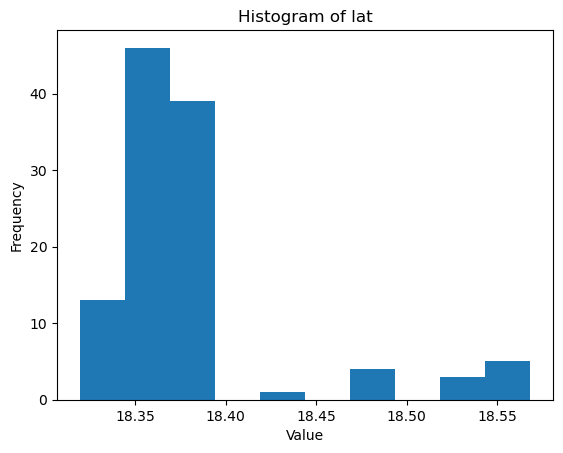

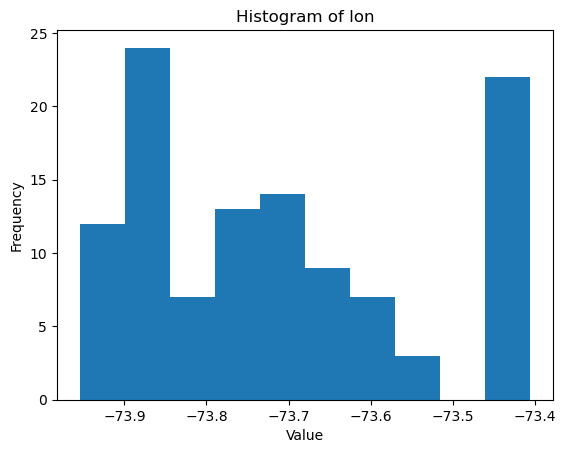

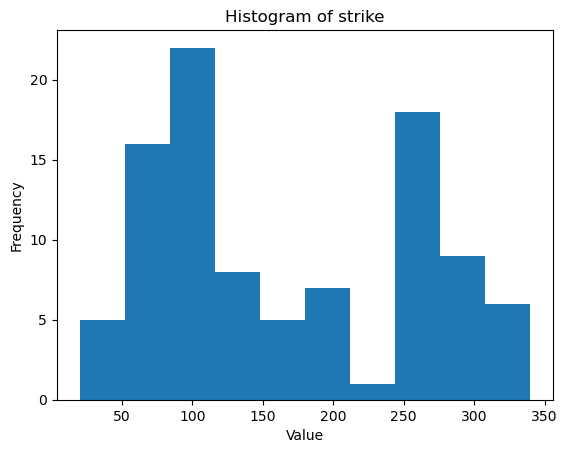

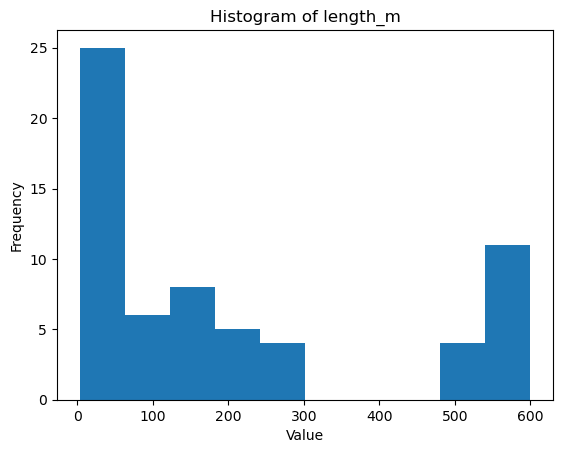

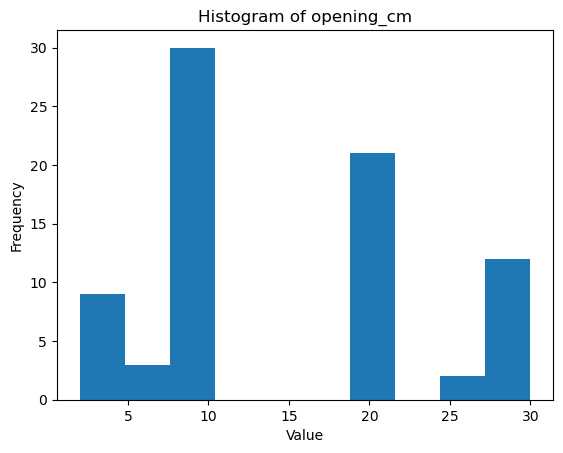

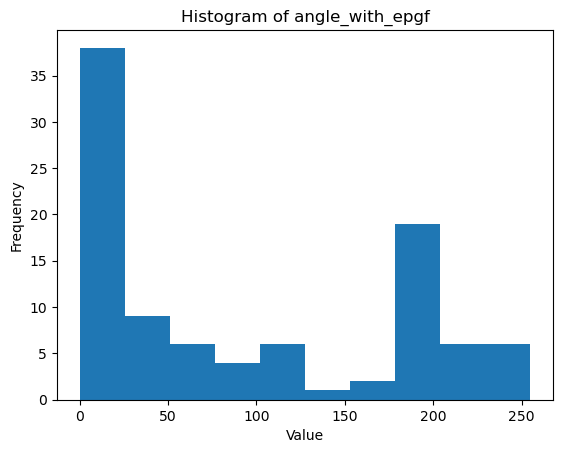

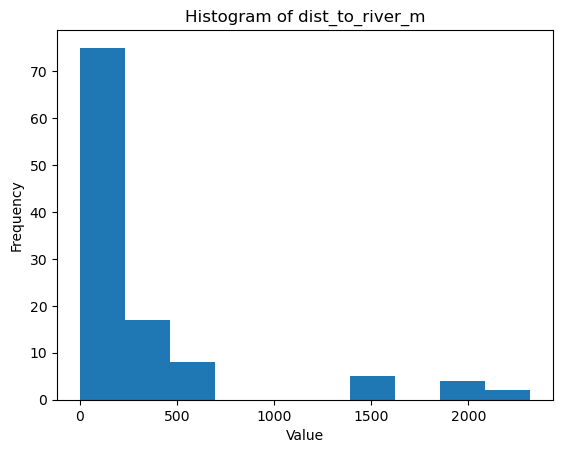

In [21]:
# Checking for outliers

# Looking at the histograms

for col in df:
    if np.dtype(df[col]) != 'object':
        plt.figure(col)
        df[col].plot.hist()
        plt.title('Histogram of {}'.format(col))
        plt.xlabel('Value')

No normal distribution and no visible outliers.

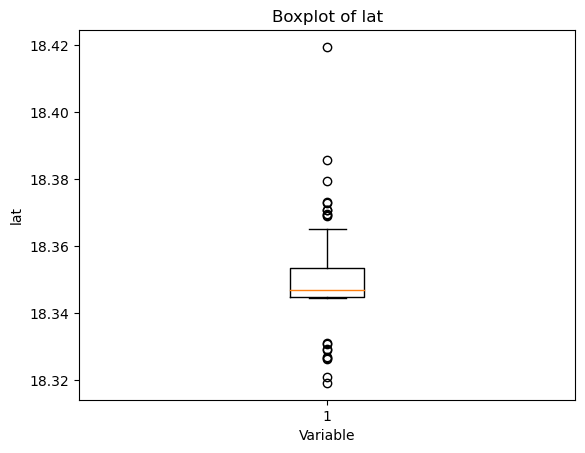

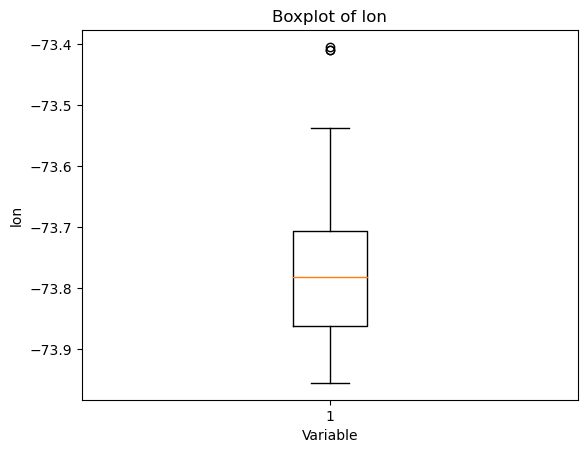

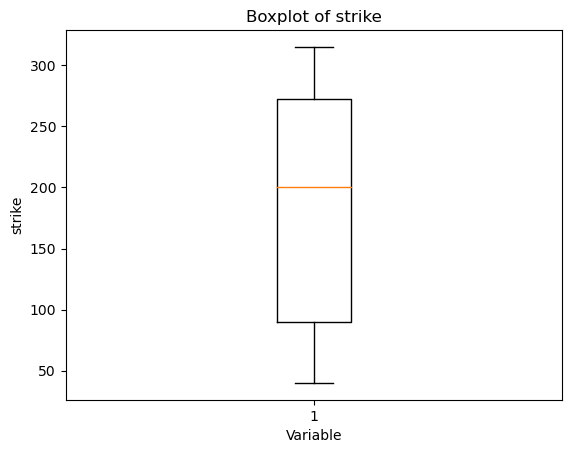

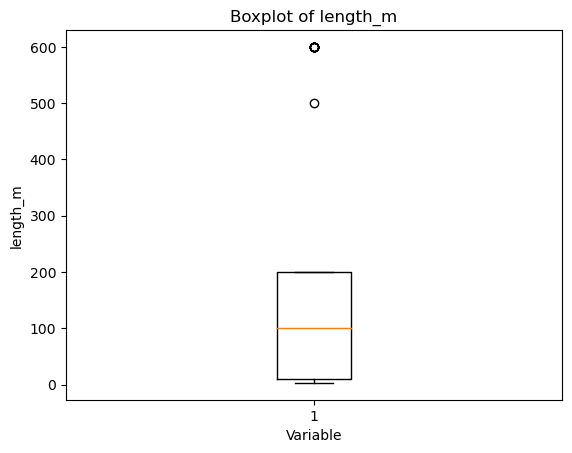

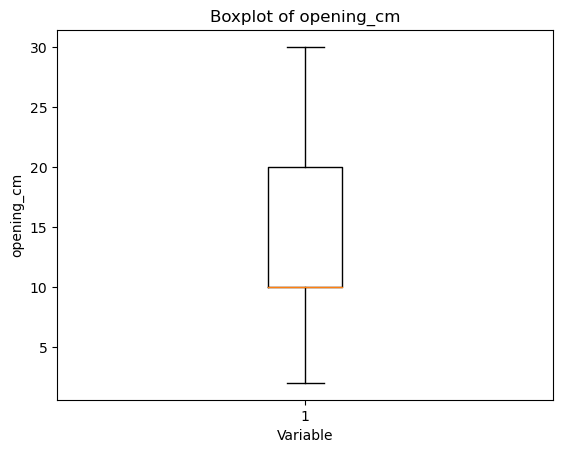

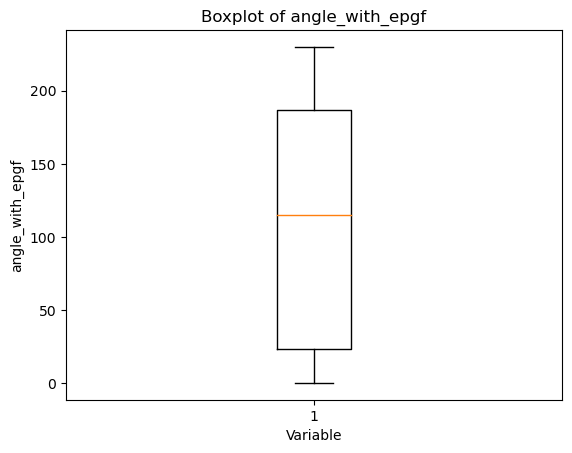

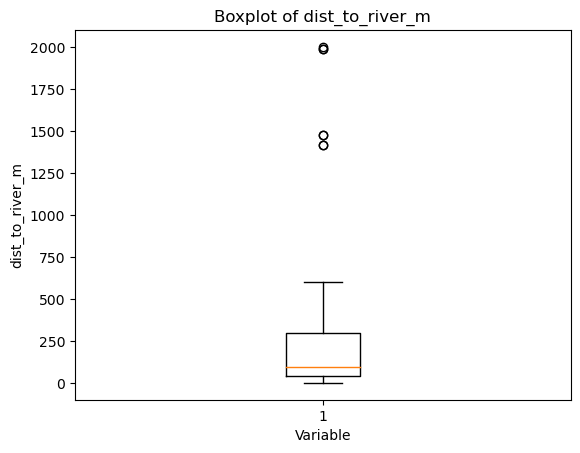

In [22]:
# Now let's visualize the variables on boxplots
filtered_df = df.dropna() # nan got to be removed for the boxplots
for col in filtered_df:
    if np.dtype(filtered_df[col]) != 'object':
        plt.figure(col) 
        plt.boxplot(filtered_df[col])
        plt.title('Boxplot of {}'.format(col))
        plt.xlabel('Variable')
        plt.ylabel(col)

The outliers in the latitude correspond to latitudes of rare places where ground failures were observed, but not along the main EPGF. Outliers in dist_to_river_m were expected and they are not bad values. The bulk of the distances are less than 700 m. Values greater than 1000 m are rare.

{'whiskers': [<matplotlib.lines.Line2D at 0x1d0f513bfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d0f5168520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d0f513bd00>],
 'medians': [<matplotlib.lines.Line2D at 0x1d0f5168910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d0f5168b80>],
 'means': []}

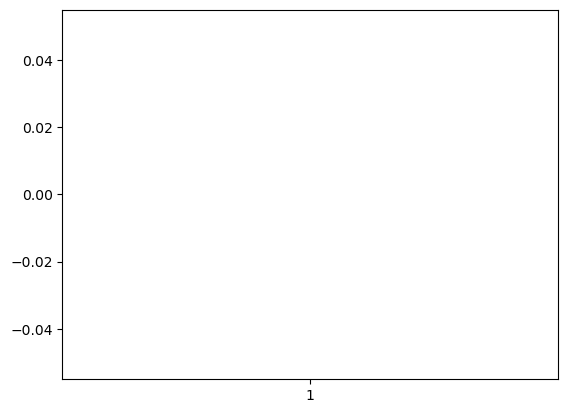

In [23]:
plt.boxplot(df['strike'])

In [24]:
df.describe()

,lat,lon,strike,length_m,opening_cm,angle_with_epgf,dist_to_river_m
count,111.000000,111.000000,97.000000,63.000000,77.000000,97.000000,111.000000
mean,18.375334,-73.706841,167.206186,207.063492,15.103896,92.927835,314.846847
std,0.058950,0.181286,95.499121,222.436281,8.881655,84.987039,520.464796
min,18.319170,-73.954720,20.000000,3.000000,2.000000,0.000000,0.000000
25%,18.346110,-73.850970,85.000000,20.000000,10.000000,20.000000,37.500000
50%,18.364720,-73.735000,140.000000,125.000000,10.000000,55.000000,135.000000
75%,18.371670,-73.570830,272.000000,300.000000,20.000000,187.000000,285.000000
max,18.568330,-73.405000,340.000000,600.000000,30.000000,255.000000,2320.000000


We will separate the rupture zone into a western and an eastern block. We define an arbitrary boundary in the middle of the rupture: 30 km of rupture to the east and 30 km of rupture to the west. The boundary is at the longitude **-73.692510°**. Let's indicate whether each observation corresponds to the east or to west.

In [25]:
df['east_west'] = df['lon'].apply(lambda x: 'east' if x > -73.692510 else 'west')
df

,date,description,possible_structure,lat,lon,strike,length_m,opening_cm,angle_with_epgf,dist_to_river_m,geology,photo_ref,east_west
0,2021-08-25,Crack in L’Asile – possible Crack ; probably s...,Rupture,18.37944,-73.40500,267.0,125.0,10.0,182.0,95,ep,IMG_0470-IMG_0479,east
1,2021-08-25,Short crack with sand around,Rupture,18.38574,-73.41023,300.0,3.0,20.0,215.0,60,qa,IMG_0480-IMG_0483,east
2,2021-08-25,Long crack with sand along a part,Rupture,18.41944,-73.41000,300.0,100.0,20.0,215.0,300,ep,IMG_0480-IMG_0483,east
3,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41167,75.0,NaN,NaN,10.0,125,qa,NaN,east
4,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41139,75.0,NaN,NaN,10.0,130,qa,NaN,east
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-09-01,Shallow but continue Crack in Coral,Rupture,18.56806,-73.89028,90.0,NaN,NaN,5.0,20,qc,NaN,west
107,2021-09-01,In Corail,Rupture,18.55139,-73.89111,NaN,NaN,NaN,NaN,1865,ep,NaN,west
108,2021-09-01,In Corail,Rupture,18.56806,-73.89083,NaN,NaN,NaN,NaN,30,qc,NaN,west
109,2021-09-01,In Corail,Rupture,18.56806,-73.89028,NaN,NaN,NaN,NaN,20,qc,NaN,west


Text(0, 0.5, 'Location')

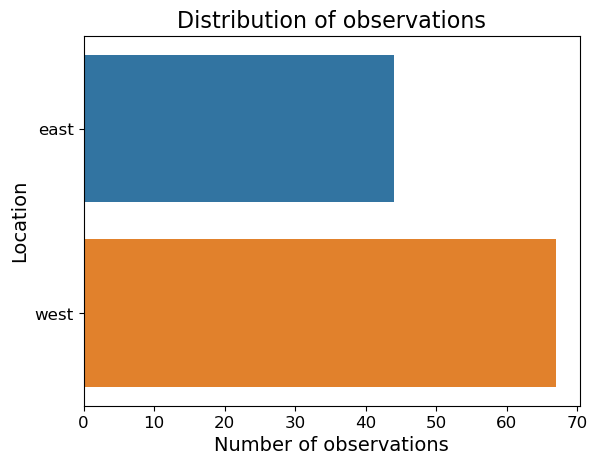

In [26]:
# Counting eastern and western observations
sns.countplot(y = 'east_west', data = df)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Location', size = 14)

In [27]:
# IMPUTATION 

imputer = KNNImputer(n_neighbors=3, weights='distance')  # filling with nearest neighbors

df_imp = df[['strike', 'length_m', 'opening_cm', 'angle_with_epgf']] # creating a dataframe with the needed columns
df_imp = imputer.fit_transform(df_imp) # after imputation, df_imp becomes an array

In [28]:
type(df_imp)

numpy.ndarray

In [29]:
df_imp

array([[267.        , 125.        ,  10.        , 182.        ],
       [300.        ,   3.        ,  20.        , 215.        ],
       [300.        , 100.        ,  20.        , 215.        ],
       [ 75.        ,  72.33333333,  10.66666667,  10.        ],
       [ 75.        ,  72.33333333,  10.66666667,  10.        ],
       [120.        , 200.        ,   8.33333333,  35.        ],
       [ 60.        , 150.        ,  20.        ,  25.        ],
       [105.        ,   7.        ,   8.33333333,  20.        ],
       [105.        ,   7.        ,   8.33333333,  20.        ],
       [ 90.        , 500.        ,  10.        ,   5.        ],
       [105.        , 500.        ,  10.        ,  20.        ],
       [105.        , 500.        ,  10.        ,  20.        ],
       [330.        , 500.        ,  10.        , 245.        ],
       [140.        , 500.        ,  10.        ,  55.        ],
       [120.        , 500.        ,  10.        ,  35.        ],
       [120.        , 500

In [30]:
# Retransforming df_imp into dataframe with no NaN
df_imp = pd.DataFrame(data=df_imp, columns=['strike', 'length_m', 'opening_cm', 'angle_with_epgf'])
df_imp

,strike,length_m,opening_cm,angle_with_epgf
0,267.000000,125.000000,10.000000,182.000000
1,300.000000,3.000000,20.000000,215.000000
2,300.000000,100.000000,20.000000,215.000000
3,75.000000,72.333333,10.666667,10.000000
4,75.000000,72.333333,10.666667,10.000000
...,...,...,...,...
106,90.000000,100.000000,16.666667,5.000000
107,167.206186,207.063492,15.103896,92.927835
108,167.206186,207.063492,15.103896,92.927835
109,167.206186,207.063492,15.103896,92.927835


In [31]:
# Adding df_imp in the big df
for i in ['strike', 'length_m', 'opening_cm', 'angle_with_epgf']: 
    df[i] = df_imp[i]
df

,date,description,possible_structure,lat,lon,strike,length_m,opening_cm,angle_with_epgf,dist_to_river_m,geology,photo_ref,east_west
0,2021-08-25,Crack in L’Asile – possible Crack ; probably s...,Rupture,18.37944,-73.40500,267.000000,125.000000,10.000000,182.000000,95,ep,IMG_0470-IMG_0479,east
1,2021-08-25,Short crack with sand around,Rupture,18.38574,-73.41023,300.000000,3.000000,20.000000,215.000000,60,qa,IMG_0480-IMG_0483,east
2,2021-08-25,Long crack with sand along a part,Rupture,18.41944,-73.41000,300.000000,100.000000,20.000000,215.000000,300,ep,IMG_0480-IMG_0483,east
3,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41167,75.000000,72.333333,10.666667,10.000000,125,qa,NaN,east
4,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41139,75.000000,72.333333,10.666667,10.000000,130,qa,NaN,east
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2021-09-01,Shallow but continue Crack in Coral,Rupture,18.56806,-73.89028,90.000000,100.000000,16.666667,5.000000,20,qc,NaN,west
107,2021-09-01,In Corail,Rupture,18.55139,-73.89111,167.206186,207.063492,15.103896,92.927835,1865,ep,NaN,west
108,2021-09-01,In Corail,Rupture,18.56806,-73.89083,167.206186,207.063492,15.103896,92.927835,30,qc,NaN,west
109,2021-09-01,In Corail,Rupture,18.56806,-73.89028,167.206186,207.063492,15.103896,92.927835,20,qc,NaN,west


Text(0.5, 1.0, 'Correlation matrix')

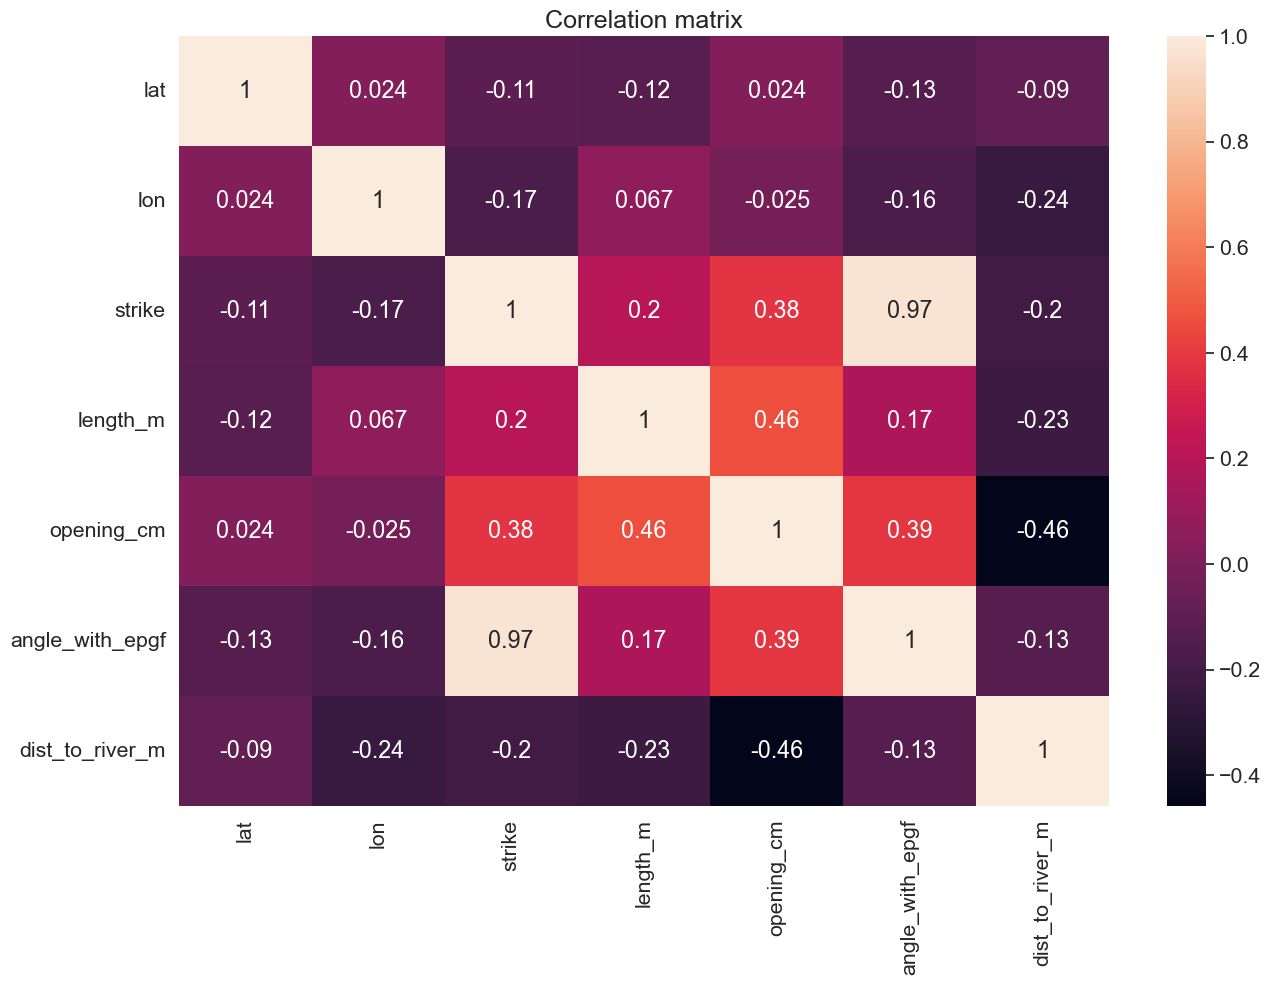

In [32]:
# Vizualizing the correlations
sns.set(font_scale=1.4)
col_corr = ['lat', 'lon', 'strike', 'length_m', 'opening_cm', 'angle_with_epgf', 'dist_to_river_m']
plt.figure(1, figsize=(15, 10))
sns.heatmap(df[col_corr].corr(), annot=True)
plt.title('Correlation matrix', size = 18)

The correlation matrix shows several expected values such as the the correlation between strike and angle_with_epgf. The length is also well correlated with the opening. The long ground failure is a big one, so the opening must follow. The lengths increase with low longitudes, that is to the west. The most interesting observation is that the dist_to_river_m is negatively correlated both with opening and length, evidencing the high influence of river on crack amplitude.

## Feature engineering

In [33]:
# opening cm to opening m
df.rename(columns = {'opening_cm': 'opening_m'})
df['opening_m'] = df['opening_cm'] / 100.0

In [34]:
del df['opening_cm']

In [35]:
# Let's have angles less than 180 
df['strike'] = df['strike'].apply(lambda x: x - 180 if x > 180 else x) 
df['angle_with_epgf'] = df['angle_with_epgf'].apply(lambda x: x - 180 if x > 180 else x) 

# Let's categorize the strikes 
df['strike_category'] = df['strike']

def category(x): 
    if x <= 15: 
        return 'dextral' 
    elif x > 15 and x <= 45: 
        return 'normal'
    elif x >= 70 and x < 100: 
        return 'sinistral'
    elif x >= 100 and x <= 150: 
        return 'thrust' 
    else: 
        return 'others'

df['strike_category'] = df['strike_category'].apply(category) 

In [36]:
# Reordering variables 
df = df[['date', 'description', 'possible_structure', 'lat', 'lon', 'strike', 'strike_category', 'length_m', 'opening_m', 
        'angle_with_epgf', 'dist_to_river_m', 'geology', 'east_west', 'photo_ref']] 
df.head()

,date,description,possible_structure,lat,lon,strike,strike_category,length_m,opening_m,angle_with_epgf,dist_to_river_m,geology,east_west,photo_ref
0,2021-08-25,Crack in L’Asile – possible Crack ; probably s...,Rupture,18.37944,-73.40500,87.0,sinistral,125.000000,0.100000,2.0,95,ep,east,IMG_0470-IMG_0479
1,2021-08-25,Short crack with sand around,Rupture,18.38574,-73.41023,120.0,thrust,3.000000,0.200000,35.0,60,qa,east,IMG_0480-IMG_0483
2,2021-08-25,Long crack with sand along a part,Rupture,18.41944,-73.41000,120.0,thrust,100.000000,0.200000,35.0,300,ep,east,IMG_0480-IMG_0483
3,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41167,75.0,sinistral,72.333333,0.106667,10.0,125,qa,east,NaN
4,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41139,75.0,sinistral,72.333333,0.106667,10.0,130,qa,east,NaN


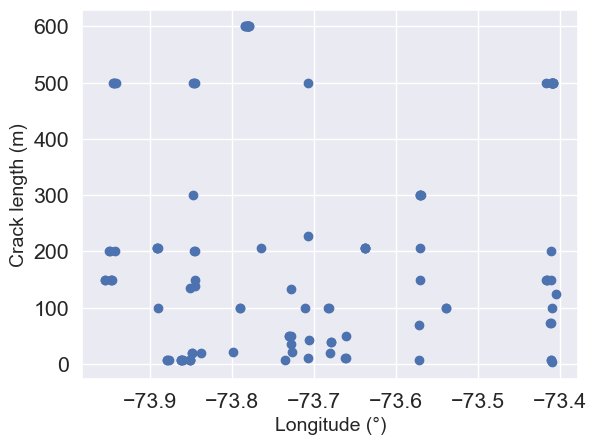

In [37]:
plt.scatter(df['lon'], df['length_m']) 
plt.xlabel("Longitude (°)", size=14)
plt.ylabel("Crack length (m)", size=14)
#plt.xscale('log')
plt.show()

In [41]:
df.shape

(111, 14)

In [44]:
df_without_big_length = df.drop(df[df['length_m']>400].index)
df_without_big_length.shape

(82, 14)

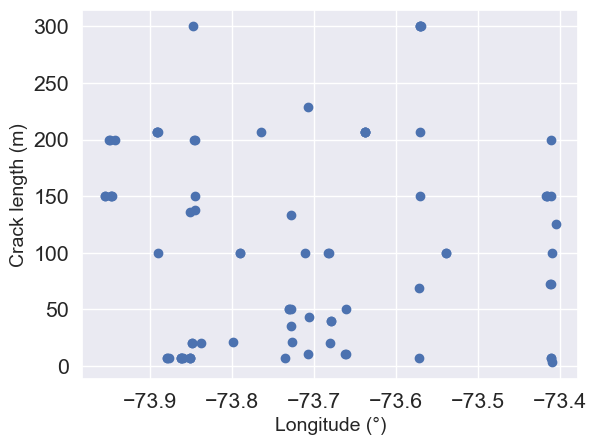

In [45]:
# Replot
plt.scatter(df_without_big_length['lon'], df_without_big_length['length_m']) 
plt.xlabel("Longitude (°)", size=14)
plt.ylabel("Crack length (m)", size=14)
#plt.xscale('log')
plt.show()

In [47]:
df_without_big_length[df_without_big_length['lon'] == df_without_big_length['lon'].min()]

,date,description,possible_structure,lat,lon,strike,strike_category,length_m,opening_m,angle_with_epgf,dist_to_river_m,geology,east_west,photo_ref
98,2021-08-30,Crack in Pèdi Tan,Rupture,18.33111,-73.95472,10.0,dextral,150.0,0.1,105.0,40,cs,west,IMG_0453_IMG_0459


In [52]:
# X-axis in km
# Defining one end of our arc to calculate distance along (arbitrarily taking 
# the first point in the example data as the reference point).
ref_point = (df_without_big_length['lat'].loc[98], df_without_big_length['lon'].loc[98])

#  Loop over each sample location calculating the distance along the arc using
#  pygeo.distance.geodesic function.
dist = []
for i in range(len(df_without_big_length)):
    cur_point = (df_without_big_length['lat'].iloc[i], df_without_big_length['lon'].iloc[i])
    cur_geodesic = distance.geodesic(ref_point, cur_point)
    cur_dist = cur_geodesic.km
    dist.append(cur_dist)

# Add computed distances to the df DataFrame as column 'Distance_km'
df_without_big_length['distance_km'] = dist

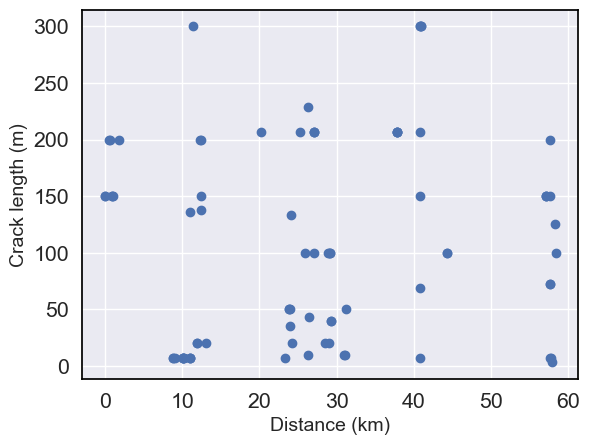

In [53]:
# Replot with X-axis in km
plt.scatter(df_without_big_length['distance_km'], df_without_big_length['length_m']) 
plt.xlabel("Distance (km)", size=14)
plt.ylabel("Crack length (m)", size=14)
#plt.xscale('log')
plt.show()

Great! We got a total distance of 60 km comparable to the rupture length. Our calculous is ok.

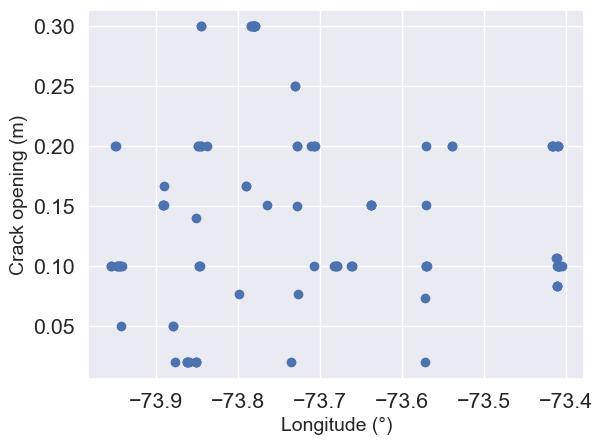

In [106]:
plt.scatter(df['lon'], df['opening_m'])
plt.xlabel("Longitude (°)", size=14)
plt.ylabel("Crack opening (m)", size=14) 
#plt.yscale('log')
plt.show()

In [57]:
# Let's make the same thing for the openings
df_without_big_opening = df.drop(df[df['opening_m']>0.25].index)
df_without_big_opening.shape

(98, 14)

In [58]:
df_without_big_opening[df_without_big_opening['lon'] == df_without_big_opening['lon'].min()]

,date,description,possible_structure,lat,lon,strike,strike_category,length_m,opening_m,angle_with_epgf,dist_to_river_m,geology,east_west,photo_ref
98,2021-08-30,Crack in Pèdi Tan,Rupture,18.33111,-73.95472,10.0,dextral,150.0,0.1,105.0,40,cs,west,IMG_0453_IMG_0459


In [59]:
# X-axis in km
# Defining one end of our arc to calculate distance along (arbitrarily taking 
# the first point in the example data as the reference point).
ref_point = (df_without_big_opening['lat'].loc[98], df_without_big_opening['lon'].loc[98])

#  Loop over each sample location calculating the distance along the arc using
#  pygeo.distance.geodesic function.
dist = []
for i in range(len(df_without_big_opening)):
    cur_point = (df_without_big_opening['lat'].iloc[i], df_without_big_opening['lon'].iloc[i])
    cur_geodesic = distance.geodesic(ref_point, cur_point)
    cur_dist = cur_geodesic.km
    dist.append(cur_dist)

# Add computed distances to the df DataFrame as column 'Distance_km'
df_without_big_opening['distance_km'] = dist

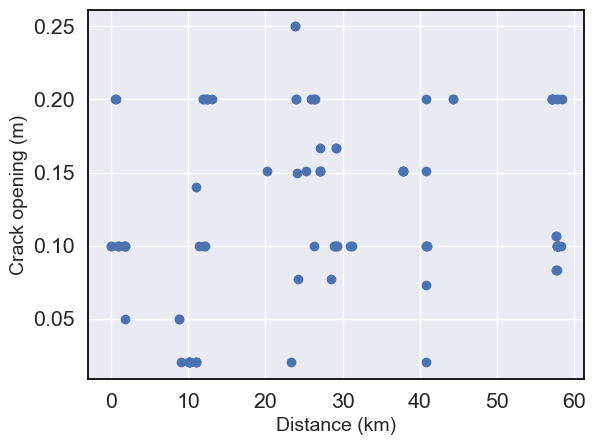

In [60]:
# Replot with X-axis in km
plt.scatter(df_without_big_opening['distance_km'], df_without_big_opening['opening_m'])
plt.xlabel("Distance (km)", size=14)
plt.ylabel("Crack opening (m)", size=14) 
#plt.yscale('log')
plt.show()

In [61]:
df[df['lon'] == df['lon'].min()]

,date,description,possible_structure,lat,lon,strike,strike_category,length_m,opening_m,angle_with_epgf,dist_to_river_m,geology,east_west,photo_ref
98,2021-08-30,Crack in Pèdi Tan,Rupture,18.33111,-73.95472,10.0,dextral,150.0,0.1,105.0,40,cs,west,IMG_0453_IMG_0459


In [62]:
# Distance for the whole dataset
ref_point = (df['lat'].loc[98], df['lon'].loc[98])

#  Loop over each sample location calculating the distance along the arc using
#  pygeo.distance.geodesic function.
dist = []
for i in range(len(df)):
    cur_point = (df['lat'].iloc[i], df['lon'].iloc[i])
    cur_geodesic = distance.geodesic(ref_point, cur_point)
    cur_dist = cur_geodesic.km
    dist.append(cur_dist)

# Add computed distances to the df DataFrame as column 'Distance_km'
df['distance_km'] = dist

In [ ]:
# ----------------------------------------------------

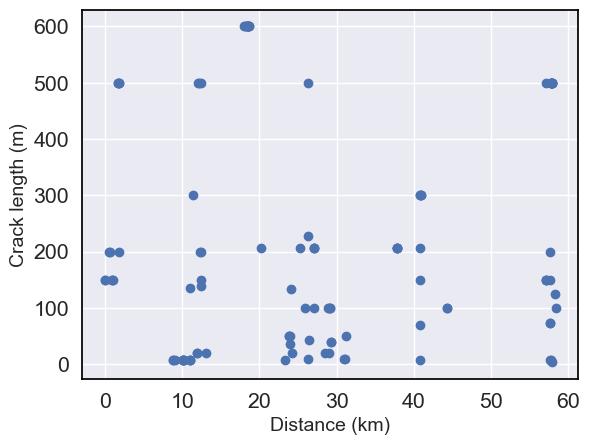

In [63]:
# Replot with X-axis in km
plt.scatter(df['distance_km'], df['length_m']) 
plt.xlabel("Distance (km)", size=14)
plt.ylabel("Crack length (m)", size=14)
#plt.xscale('log')
plt.show()

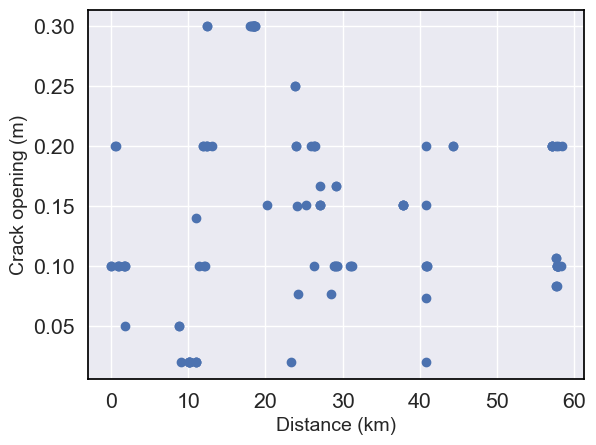

In [64]:
# Replot with X-axis in km
plt.scatter(df['distance_km'], df['opening_m']) 
plt.xlabel("Distance (km)", size=14)
plt.ylabel("Crack opening (m)", size=14)
#plt.xscale('log')
plt.show()

In [ ]:
# ----------------------------------------------------------

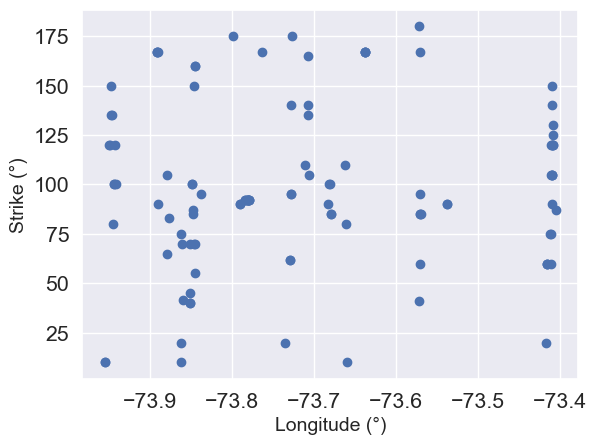

In [107]:
plt.scatter(df['lon'], df['strike'])
plt.xlabel("Longitude (°)", size=14)
plt.ylabel("Strike (°)", size=14) 
#plt.xscale('log')
#plt.yscale('log')
plt.show()

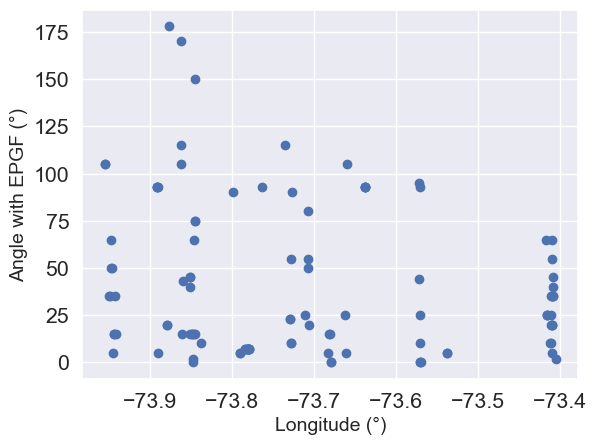

In [108]:
plt.scatter(df['lon'], df['angle_with_epgf'])
plt.xlabel("Longitude (°)", size=14)
plt.ylabel("Angle with EPGF (°)", size=14) 
#plt.xscale('log')
#plt.yscale('log')
plt.show()

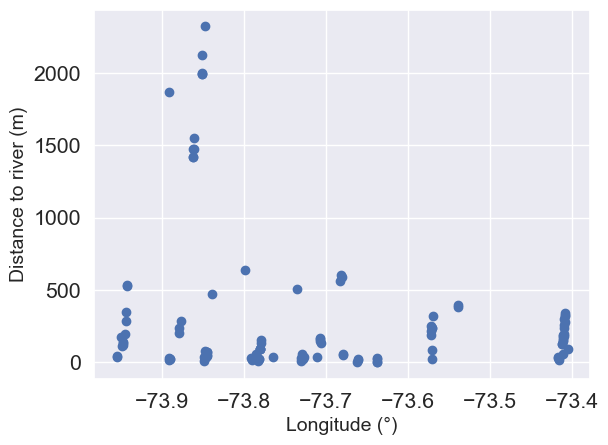

In [109]:
plt.scatter(df['lon'], df['dist_to_river_m'])
plt.xlabel("Longitude (°)", size=14)
plt.ylabel("Distance to river (m)", size=14) 
#plt.xscale('log')
#plt.yscale('log')
plt.show()

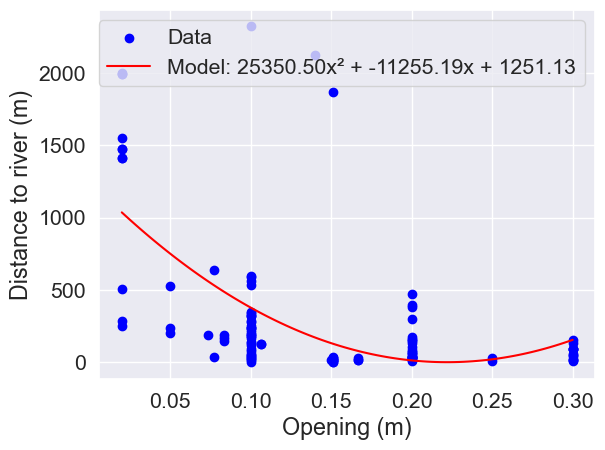

In [110]:
coef = np.polyfit(df['opening_m'], df['dist_to_river_m'], 2)
xmod = np.linspace(min(df['opening_m']), max(df['opening_m']), 100) # Compute the model for 100 value between xmin and xmax

model = [coef[2] + coef[1] * val + coef[0] * val**2 for val in xmod] 

plt.figure(1)
plt.scatter(df['opening_m'], df['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = f"Model: {coef[0]:.2f}x² + {coef[1]:.2f}x + {coef[2]:.2f}") 
plt.xlabel("Opening (m)")
plt.ylabel("Distance to river (m)")
plt.legend()
plt.show()  

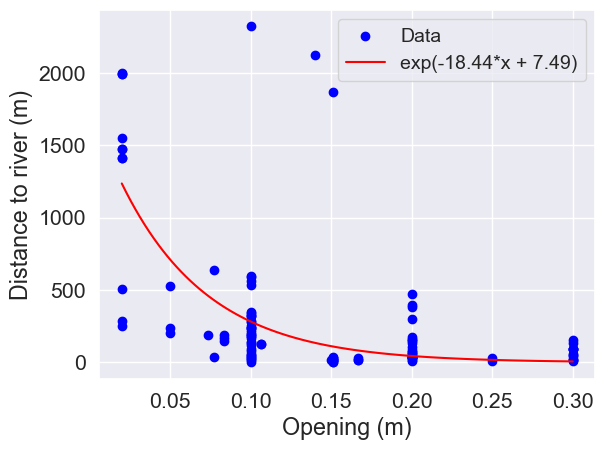

In [111]:
def expo(x, a, b):
    return np.exp(a*x + b)

param, cov = curve_fit(expo, df['opening_m'], df['dist_to_river_m']) 

xmod = np.linspace(min(df['opening_m']), max(df['opening_m']), 100) # Compute the model for 100 value between xmin and xmax


model = expo(xmod, param[0], param[1])

plt.figure(1)
plt.scatter(df['opening_m'], df['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = "exp({:.2f}*x + {:.2f})".format(param[0], param[1])) 
plt.xlabel("Opening (m)")
plt.ylabel("Distance to river (m)") 
plt.legend(fontsize='14')
plt.show()  


In [112]:
param

array([-18.43851205,   7.48827959])

In [113]:
cov

array([[ 7.53859244, -0.275672  ],
       [-0.275672  ,  0.01755072]])

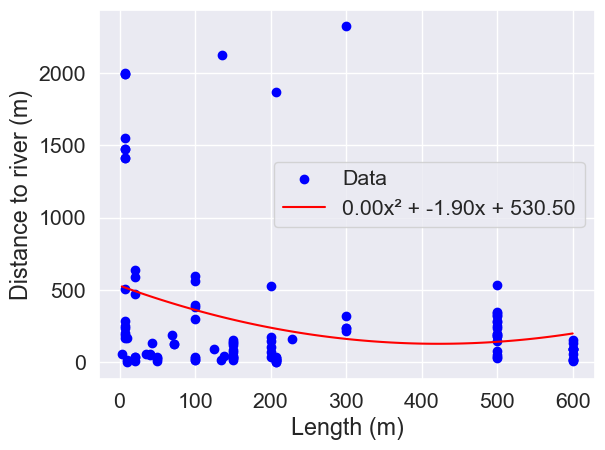

In [114]:
coef = np.polyfit(df['length_m'], df['dist_to_river_m'], 2)
xmod = np.linspace(min(df['length_m']), max(df['length_m']), 100) # Compute the model for 100 value between xmin and xmax

model = [coef[2] + coef[1] * val + coef[0] * val**2 for val in xmod] 

plt.figure(1)
plt.scatter(df['length_m'], df['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = f"{coef[0]:.2f}x² + {coef[1]:.2f}x + {coef[2]:.2f}") 
plt.xlabel("Length (m)")
plt.ylabel("Distance to river (m)")
plt.legend()
plt.show()

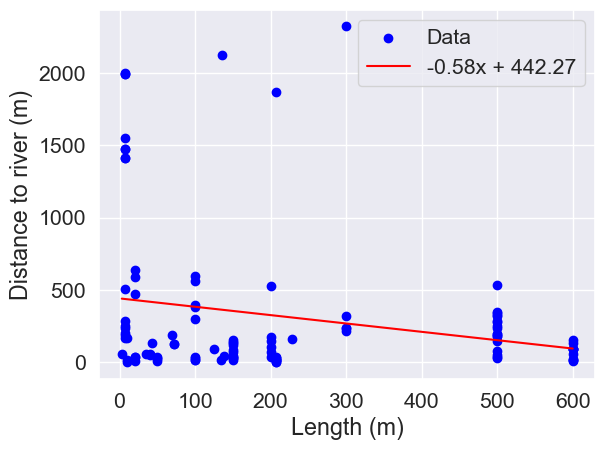

In [115]:
coef = np.polyfit(df['length_m'], df['dist_to_river_m'], 1)
xmod = np.linspace(min(df['length_m']), max(df['length_m']), 100) # Compute the model for 100 value between xmin and xmax

model = [coef[1] + coef[0] * val for val in xmod] 

plt.figure(1)
plt.scatter(df['length_m'], df['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = f"{coef[0]:.2f}x + {coef[1]:.2f}") 
plt.xlabel("Length (m)")
plt.ylabel("Distance to river (m)")
plt.legend()
plt.show()

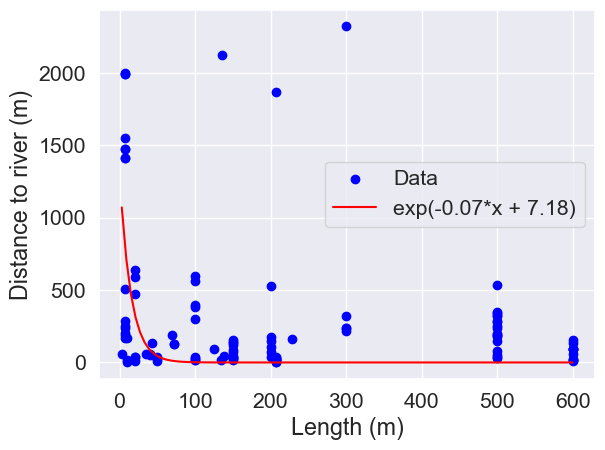

In [116]:
def expo2(x, a, b):
    return np.exp(a*x + b)

param, cov = curve_fit(expo2, df['length_m'], df['dist_to_river_m'], p0=[-1.95, 0.5], maxfev=1000) 

xmod = np.linspace(min(df['length_m']), max(df['length_m']), 100) # Compute the model for 100 value between xmin and xmax

model = expo2(xmod, param[0], param[1])

plt.figure(1)
plt.scatter(df['length_m'], df['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = "exp({:.2f}*x + {:.2f})".format(param[0], param[1])) 
plt.xlabel("Length (m)")
plt.ylabel("Distance to river (m)") 
plt.legend()
plt.show()  

In [117]:
param

array([-0.06775719,  7.17934153])

In [118]:
cov

array([[ 0.00132849, -0.01027757],
       [-0.01027757,  0.09870976]])

In [ ]:
# --------------------------------------------

In [ ]:
# What if we drop 'outliers' to refine our best models?

In [110]:
df_opening_model = df.drop(df[df['dist_to_river_m'] > 1600].index)
df_opening_model = df_opening_model.drop(df_opening_model[df_opening_model['opening_m'] > 0.25].index)
df_opening_model.shape

(92, 15)

In [111]:
#df_opening_model = df.drop(df[df['opening_m'] > 0.25].index)
#df_opening_model.shape

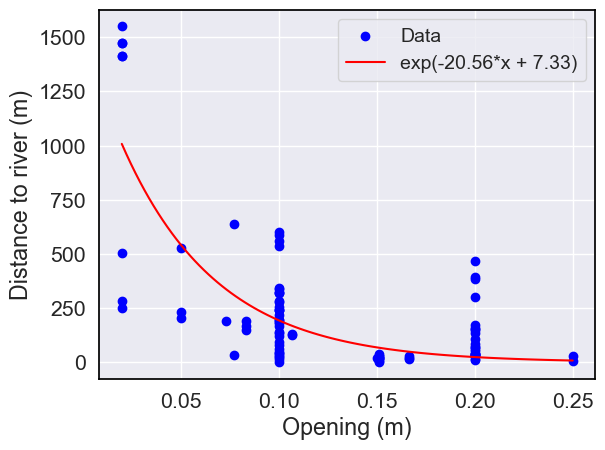

In [112]:
def expo(x, a, b):
    return np.exp(a*x + b)

param, cov = curve_fit(expo, df_opening_model['opening_m'], df_opening_model['dist_to_river_m']) 

xmod = np.linspace(min(df_opening_model['opening_m']), max(df_opening_model['opening_m']), 100) # Compute the model for 100 value between xmin and xmax


model = expo(xmod, param[0], param[1])

plt.figure(1)
plt.scatter(df_opening_model['opening_m'], df_opening_model['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = "exp({:.2f}*x + {:.2f})".format(param[0], param[1])) 
plt.xlabel("Opening (m)")
plt.ylabel("Distance to river (m)") 
plt.legend(fontsize='14')
plt.show()  


In [119]:
df_opening_model = df.drop(df[df['dist_to_river_m'] > 1000].index)
df_opening_model = df_opening_model.drop(df_opening_model[df_opening_model['opening_m'] > 0.25].index)
df_opening_model.shape

(87, 15)

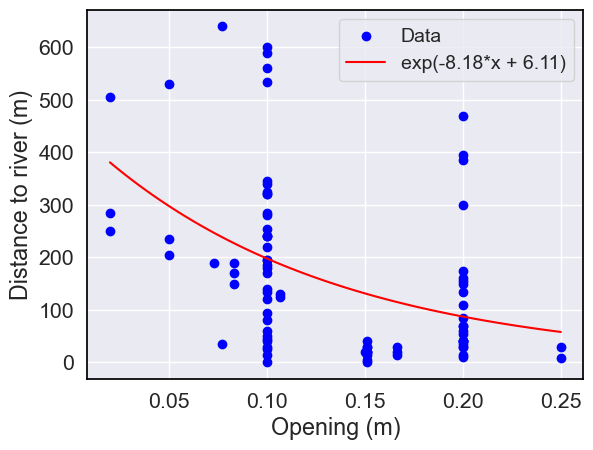

In [120]:
def expo(x, a, b):
    return np.exp(a*x + b)

param, cov = curve_fit(expo, df_opening_model['opening_m'], df_opening_model['dist_to_river_m']) 

xmod = np.linspace(min(df_opening_model['opening_m']), max(df_opening_model['opening_m']), 100) # Compute the model for 100 value between xmin and xmax


model = expo(xmod, param[0], param[1])

plt.figure(1)
plt.scatter(df_opening_model['opening_m'], df_opening_model['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = "exp({:.2f}*x + {:.2f})".format(param[0], param[1])) 
plt.xlabel("Opening (m)")
plt.ylabel("Distance to river (m)") 
plt.legend(fontsize='14')
plt.show() 

Bad model by rejecting dist_to_river > 1000 m

In [117]:
df_length_model = df.drop(df[df['dist_to_river_m'] > 1600].index)
df_length_model = df_length_model.drop(df_length_model[df_length_model['length_m'] > 400].index)
df_length_model.shape

(76, 15)

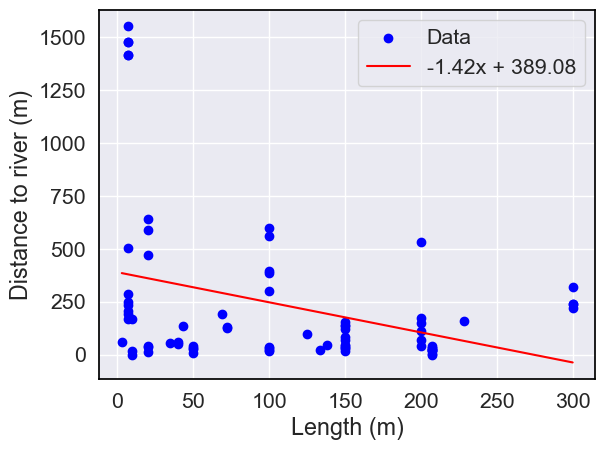

In [118]:
coef = np.polyfit(df_length_model['length_m'], df_length_model['dist_to_river_m'], 1)
xmod = np.linspace(min(df_length_model['length_m']), max(df_length_model['length_m']), 100) # Compute the model for 100 value between xmin and xmax

model = [coef[1] + coef[0] * val for val in xmod] 

plt.figure(1)
plt.scatter(df_length_model['length_m'], df_length_model['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = f"{coef[0]:.2f}x + {coef[1]:.2f}") 
plt.xlabel("Length (m)")
plt.ylabel("Distance to river (m)")
plt.legend()
plt.show()

In [121]:
df_length_model = df.drop(df[df['dist_to_river_m'] > 1000].index)
df_length_model = df_length_model.drop(df_length_model[df_length_model['length_m'] > 400].index)
df_length_model.shape

(71, 15)

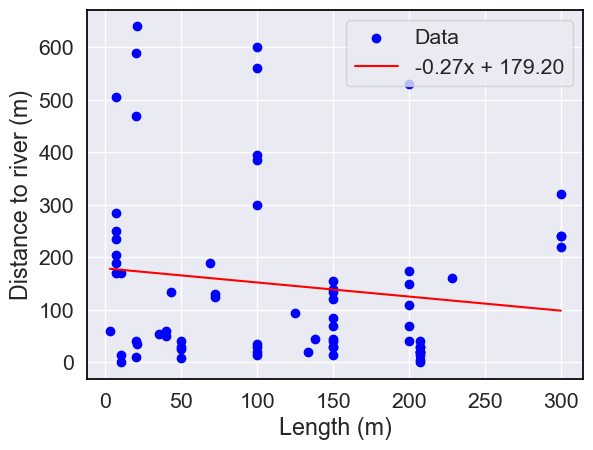

In [122]:
coef = np.polyfit(df_length_model['length_m'], df_length_model['dist_to_river_m'], 1)
xmod = np.linspace(min(df_length_model['length_m']), max(df_length_model['length_m']), 100) # Compute the model for 100 value between xmin and xmax

model = [coef[1] + coef[0] * val for val in xmod] 

plt.figure(1)
plt.scatter(df_length_model['length_m'], df_length_model['dist_to_river_m'], marker = "o", color = "blue", label = "Data")
plt.plot(xmod, model, color = "red", label = f"{coef[0]:.2f}x + {coef[1]:.2f}") 
plt.xlabel("Length (m)")
plt.ylabel("Distance to river (m)")
plt.legend()
plt.show()

Bad fit!

In [ ]:
# -------------------------------------------------------------------

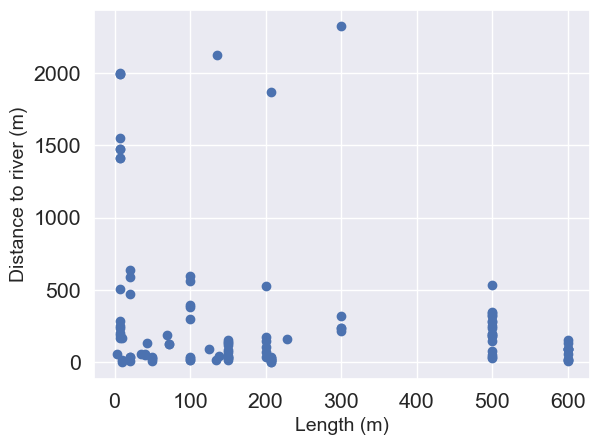

In [119]:
plt.scatter(df['length_m'], df['dist_to_river_m'])
plt.xlabel("Length (m)", size=14)
plt.ylabel("Distance to river (m)", size=14) 
#plt.xscale('log')
#plt.yscale('log')
plt.show()

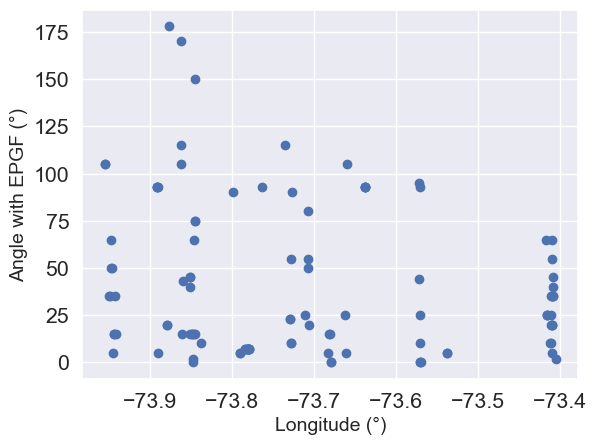

In [120]:
plt.scatter(df['lon'], df['angle_with_epgf'])
plt.xlabel("Longitude (°)", size=14)
plt.ylabel("Angle with EPGF (°)", size=14) 
plt.show()

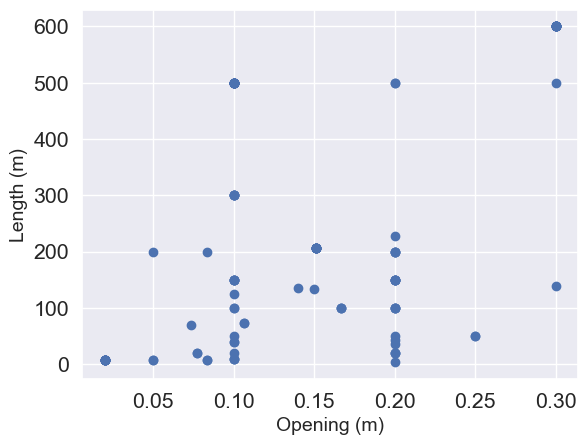

In [121]:
plt.scatter(df['opening_m'], df['length_m'])
plt.xlabel("Opening (m)", size=14)
plt.ylabel("Length (m)", size=14) 
plt.show()

<Axes: xlabel='geology', ylabel='lon'>

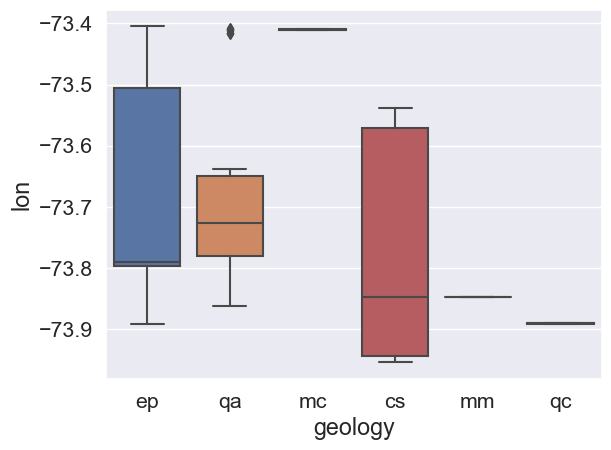

In [122]:
sns.boxplot(x=df['geology'], y=df['lon'])

<Axes: xlabel='geology', ylabel='opening_m'>

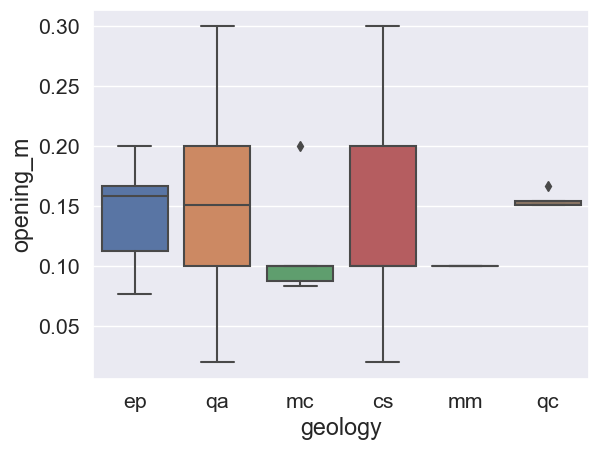

In [123]:
sns.boxplot(x=df['geology'], y=df['opening_m'])

<Axes: xlabel='geology', ylabel='length_m'>

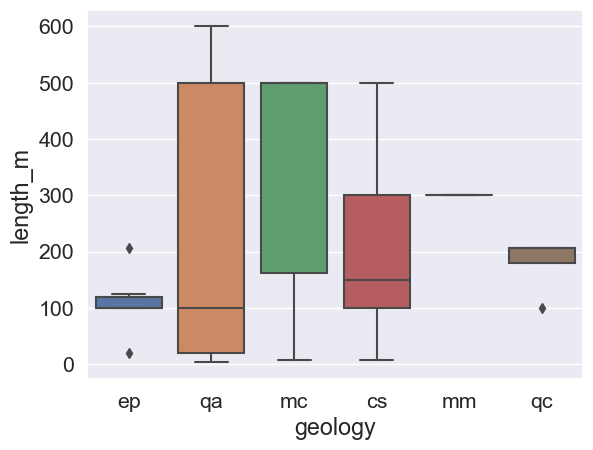

In [124]:
sns.boxplot(x=df['geology'], y=df['length_m'])

<Axes: xlabel='strike_category', ylabel='lon'>

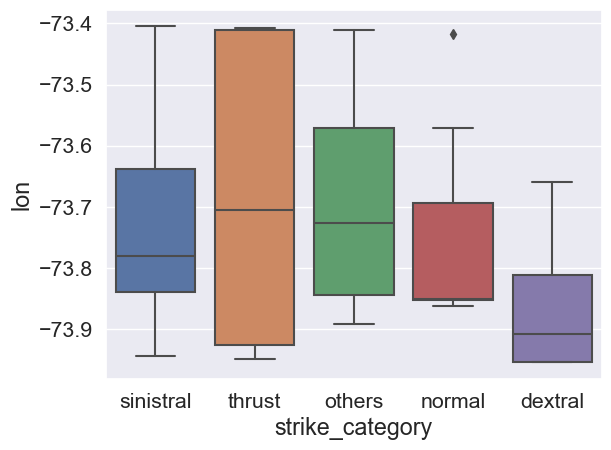

In [125]:
sns.boxplot(x=df['strike_category'], y=df['lon'])

Let's split datafame into east and west

In [126]:
df_east = df[df['east_west']=='east'] 
df_west = df[df['east_west']=='west'] 

print(df_east.shape)
print(df_west.shape)

(44, 14)
(67, 14)


<Axes: xlabel='geology', ylabel='opening_m'>

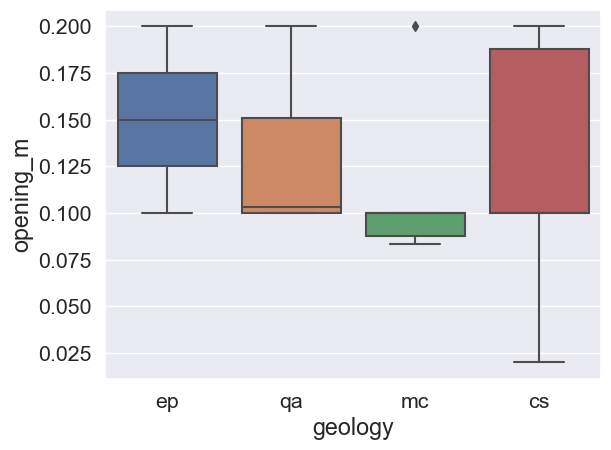

In [127]:
sns.boxplot(x=df_east['geology'], y=df_east['opening_m']) 

<Axes: xlabel='geology', ylabel='length_m'>

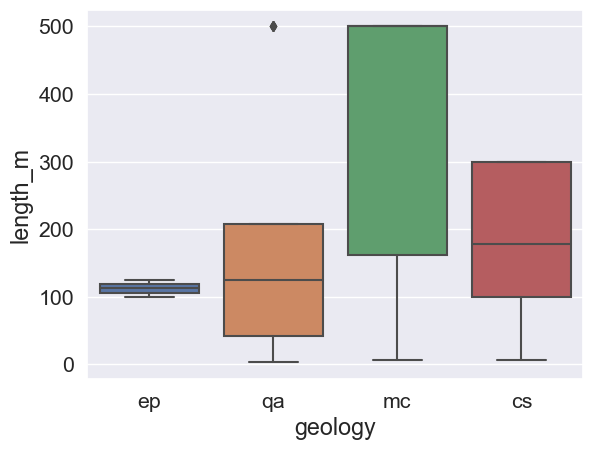

In [128]:
sns.boxplot(x=df_east['geology'], y=df_east['length_m'])

Text(0, 0.5, 'Strike category')

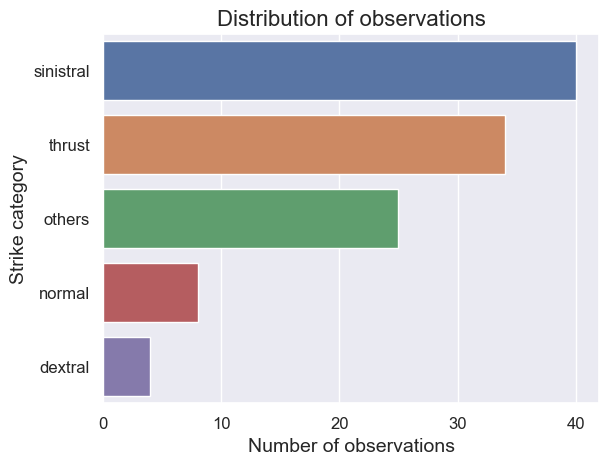

In [129]:
sns.countplot(y = 'strike_category', data = df)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Strike category', size = 14)

In [130]:
df['strike_category'].value_counts()

sinistral    40
thrust       34
others       25
normal        8
dextral       4
Name: strike_category, dtype: int64

Text(0, 0.5, 'Strike category')

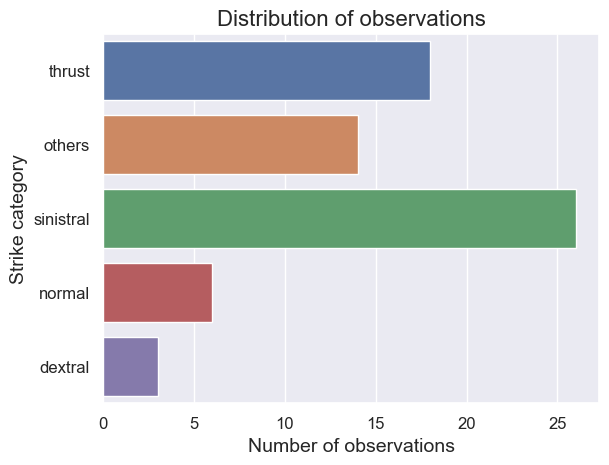

In [131]:
sns.countplot(y = 'strike_category', data = df_west)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Strike category', size = 14)

In [132]:
df_west['strike_category'].value_counts()

sinistral    26
thrust       18
others       14
normal        6
dextral       3
Name: strike_category, dtype: int64

Text(0, 0.5, 'Strike category')

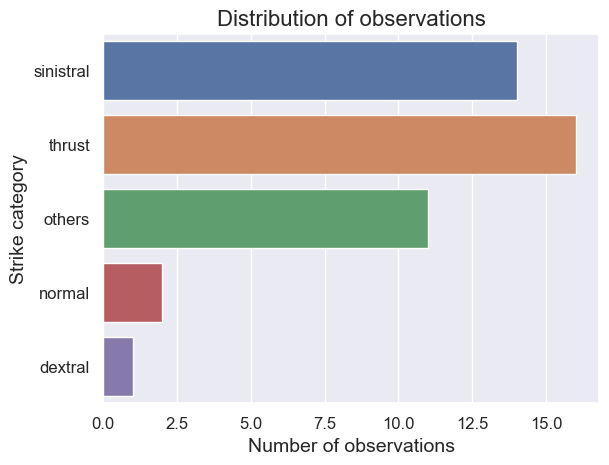

In [133]:
sns.countplot(y = 'strike_category', data = df_east)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Strike category', size = 14)

In [134]:
df_east['strike_category'].value_counts()

thrust       16
sinistral    14
others       11
normal        2
dextral       1
Name: strike_category, dtype: int64

Let's see which part in the eastern part has the most thrusting...

In [135]:
df_east.describe()

,lat,lon,strike,length_m,opening_m,angle_with_epgf,dist_to_river_m
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,18.379922,-73.514033,101.341612,209.499639,0.125270,33.423618,184.318182
std,0.037393,0.110541,39.201080,179.341063,0.046496,31.792873,159.302954
min,18.346940,-73.682500,10.000000,3.000000,0.020000,0.000000,0.000000
25%,18.370830,-73.637500,83.750000,71.500000,0.100000,8.750000,37.500000
50%,18.371670,-73.477500,97.500000,150.000000,0.100000,25.000000,175.000000
75%,18.373060,-73.410268,120.000000,300.000000,0.151039,44.250000,261.250000
max,18.490560,-73.405000,180.000000,500.000000,0.200000,105.000000,600.000000


In [136]:
df_east['east_nb'] = df_east['lon'].apply(lambda x: 'east1' if x <= -73.477500 else 'east2')
df_east

,date,description,possible_structure,lat,lon,strike,strike_category,length_m,opening_m,angle_with_epgf,dist_to_river_m,geology,east_west,photo_ref,east_nb
0,2021-08-25,Crack in L’Asile – possible Crack ; probably s...,Rupture,18.37944,-73.40500,87.000000,sinistral,125.000000,0.100000,2.000000,95,ep,east,IMG_0470-IMG_0479,east2
1,2021-08-25,Short crack with sand around,Rupture,18.38574,-73.41023,120.000000,thrust,3.000000,0.200000,35.000000,60,qa,east,IMG_0480-IMG_0483,east2
2,2021-08-25,Long crack with sand along a part,Rupture,18.41944,-73.41000,120.000000,thrust,100.000000,0.200000,35.000000,300,ep,east,IMG_0480-IMG_0483,east2
3,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41167,75.000000,sinistral,72.333333,0.106667,10.000000,125,qa,east,NaN,east2
4,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41139,75.000000,sinistral,72.333333,0.106667,10.000000,130,qa,east,NaN,east2
5,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41111,120.000000,thrust,200.000000,0.083333,35.000000,150,mc,east,NaN,east2
6,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41083,60.000000,others,150.000000,0.200000,25.000000,155,mc,east,NaN,east2
7,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41056,105.000000,thrust,7.000000,0.083333,20.000000,170,mc,east,NaN,east2
8,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41028,105.000000,thrust,7.000000,0.083333,20.000000,190,mc,east,NaN,east2
9,2021-08-25,Deep crack in the marl,Rupture,18.37167,-73.41028,90.000000,sinistral,500.000000,0.100000,5.000000,180,mc,east,IMG_0490-IMG_0503,east2


Let's split dataframe into east1 and east2

In [137]:
df_east1 = df_east[df_east['east_nb']=='east1'] 
df_east2 = df_east[df_east['east_nb']=='east2']

print(df_east1.shape)
print(df_east2.shape)

(22, 15)
(22, 15)


Text(0, 0.5, 'Strike category')

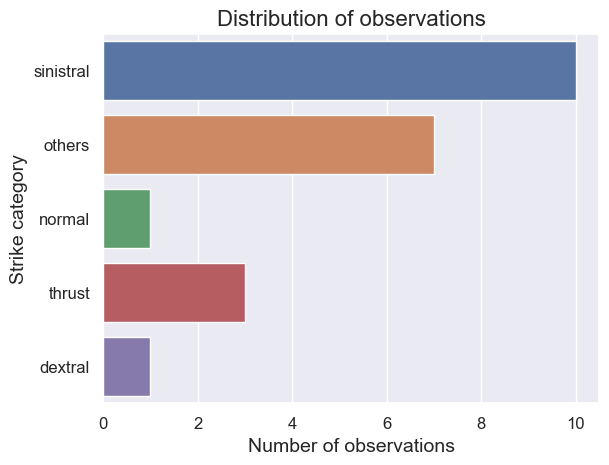

In [138]:
sns.countplot(y = 'strike_category', data = df_east1)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Strike category', size = 14)

In [139]:
df_east1['strike_category'].value_counts()

sinistral    10
others        7
thrust        3
normal        1
dextral       1
Name: strike_category, dtype: int64

Text(0, 0.5, 'Strike category')

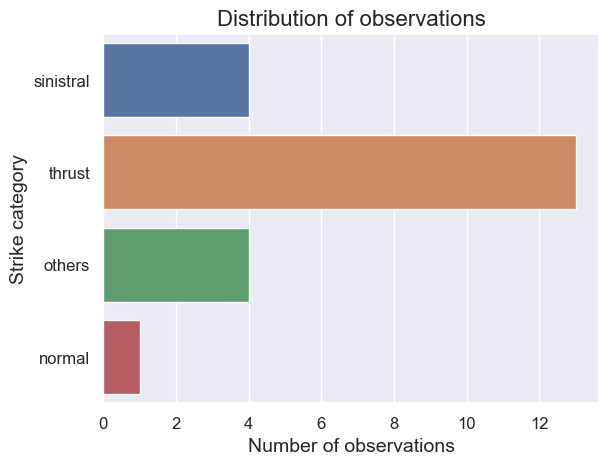

In [140]:
sns.countplot(y = 'strike_category', data = df_east2)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Strike category', size = 14)

In [141]:
df_east2['strike_category'].value_counts()

thrust       13
sinistral     4
others        4
normal        1
Name: strike_category, dtype: int64

Let's go farther

In [142]:
df_east2.describe()

,lat,lon,strike,length_m,opening_m,angle_with_epgf,dist_to_river_m
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,18.375022,-73.410882,97.818182,281.212121,0.130152,29.636364,173.181818
std,0.010481,0.002927,32.322241,210.037476,0.049243,17.225522,102.301439
min,18.370830,-73.416670,20.000000,3.000000,0.083333,2.000000,15.000000
25%,18.371460,-73.411320,75.000000,106.250000,0.100000,20.000000,102.500000
50%,18.371670,-73.410255,105.000000,175.000000,0.100000,25.000000,175.000000
75%,18.373262,-73.409238,120.000000,500.000000,0.200000,35.000000,251.250000
max,18.419440,-73.405000,150.000000,500.000000,0.200000,65.000000,340.000000


In [143]:
df_east2['east_nb_nb'] = df_east2['lon'].apply(lambda x: 'east2_1' if x < -73.410255 else 'east2_2')
df_east2

,date,description,possible_structure,lat,lon,strike,strike_category,length_m,opening_m,angle_with_epgf,dist_to_river_m,geology,east_west,photo_ref,east_nb,east_nb_nb
0,2021-08-25,Crack in L’Asile – possible Crack ; probably s...,Rupture,18.37944,-73.40500,87.0,sinistral,125.000000,0.100000,2.0,95,ep,east,IMG_0470-IMG_0479,east2,east2_2
1,2021-08-25,Short crack with sand around,Rupture,18.38574,-73.41023,120.0,thrust,3.000000,0.200000,35.0,60,qa,east,IMG_0480-IMG_0483,east2,east2_2
2,2021-08-25,Long crack with sand along a part,Rupture,18.41944,-73.41000,120.0,thrust,100.000000,0.200000,35.0,300,ep,east,IMG_0480-IMG_0483,east2,east2_2
3,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41167,75.0,sinistral,72.333333,0.106667,10.0,125,qa,east,NaN,east2,east2_1
4,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41139,75.0,sinistral,72.333333,0.106667,10.0,130,qa,east,NaN,east2,east2_1
5,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41111,120.0,thrust,200.000000,0.083333,35.0,150,mc,east,NaN,east2,east2_1
6,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41083,60.0,others,150.000000,0.200000,25.0,155,mc,east,NaN,east2,east2_1
7,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41056,105.0,thrust,7.000000,0.083333,20.0,170,mc,east,NaN,east2,east2_1
8,2021-08-25,Crack in the marl,Rupture,18.37167,-73.41028,105.0,thrust,7.000000,0.083333,20.0,190,mc,east,NaN,east2,east2_1
9,2021-08-25,Deep crack in the marl,Rupture,18.37167,-73.41028,90.0,sinistral,500.000000,0.100000,5.0,180,mc,east,IMG_0490-IMG_0503,east2,east2_1


Let's split dataframe into east2_1 and east2_2

In [144]:
df_east2_1 = df_east2[df_east2['east_nb_nb']=='east2_1'] 
df_east2_2 = df_east2[df_east2['east_nb_nb']=='east2_2'] 

print(df_east2_1.shape)
print(df_east2_2.shape)

(11, 16)
(11, 16)


Text(0, 0.5, 'Strike category')

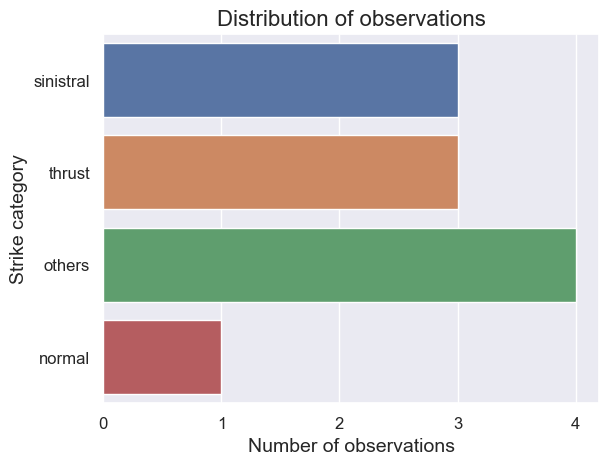

In [145]:
sns.countplot(y = 'strike_category', data = df_east2_1)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Strike category', size = 14)

In [146]:
df_east2_1['strike_category'].value_counts()

others       4
sinistral    3
thrust       3
normal       1
Name: strike_category, dtype: int64

Text(0, 0.5, 'Strike category')

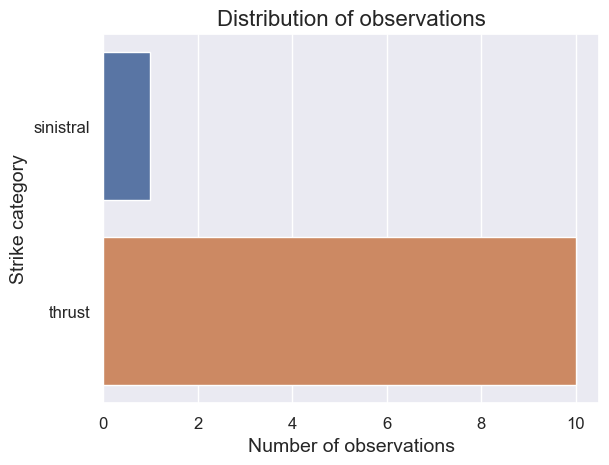

In [147]:
sns.countplot(y = 'strike_category', data = df_east2_2)
plt.title('Distribution of observations', size = 16)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.xlabel('Number of observations', size = 14)
plt.ylabel('Strike category', size = 14)

In [148]:
df_east2_2['strike_category'].value_counts()

thrust       10
sinistral     1
Name: strike_category, dtype: int64

In [123]:
# Saving dataframe: 
df.to_excel('SaintFleur_etal_G3_TabS2.xlsx')
